In [140]:
%run Pre.py

In [141]:
train.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [77]:
print(train.shape)

(30471, 292)


In [35]:
FI = pd.read_csv('Basemodel_FScore.csv')
FI

,Feature,Score,Percentage
0,full_sq,1261,0.113074
1,life_sq,1852,0.166069
2,floor,2234,0.200323
3,build_year,2563,0.229824
4,max_floor,2865,0.256905
5,kitch_sq,3063,0.274659
6,num_room,3230,0.289634
7,month,3381,0.303174
8,day,3527,0.316266
9,year,3669,0.328999


## A: Full_sq

In [13]:
from ggplot import *

In [14]:
g = ggplot(train,aes(x='full_sq',y='price_doc'))+geom_point()+stat_smooth()

/home/jiashen/env3/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


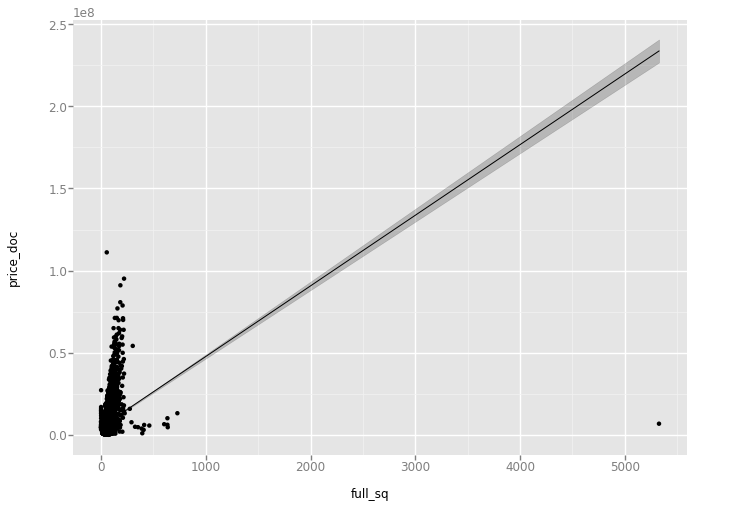

<ggplot: (-9223363244931771732)>


In [15]:
print(g)

In [17]:
max_sq = max(train['full_sq'])
print(train[train['full_sq']==max_sq]['price_doc'])
print(np.mean(train['price_doc']))

3527    6868818
Name: price_doc, dtype: int64
7123035.27774


In [21]:
print(np.corrcoef(train['full_sq'],train['price_doc']))

[[ 1.          0.34184046]
 [ 0.34184046  1.        ]]


In [18]:
train_sub = train[train['full_sq']<max_sq]

**Check the correlation again**

In [19]:
g = ggplot(train_sub,aes(x='full_sq',y='price_doc'))+geom_point()+stat_smooth()

/home/jiashen/env3/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


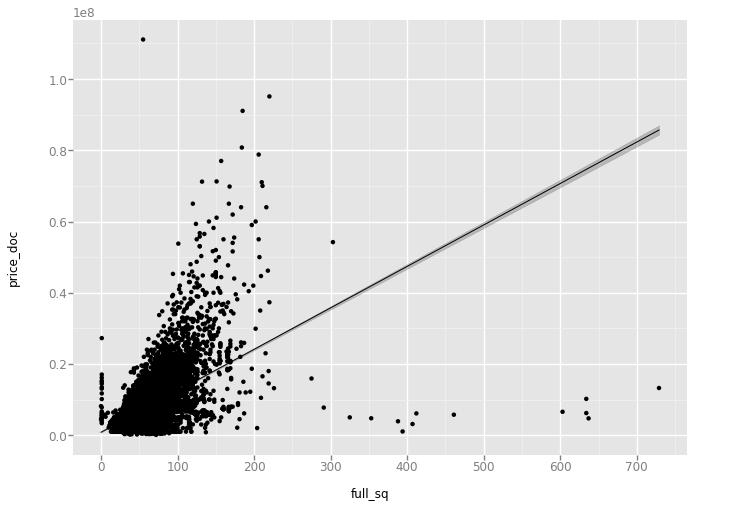

<ggplot: (-9223363244931770168)>


In [20]:
print(g)

In [22]:
print(np.corrcoef(train_sub['full_sq'],train_sub['price_doc']))

[[ 1.          0.56285507]
 [ 0.56285507  1.        ]]


In [26]:
train_sub2 = train_sub[train_sub['full_sq']>2]

In [27]:
print(np.corrcoef(train_sub2['full_sq'],train_sub2['price_doc']))

[[ 1.          0.56537444]
 [ 0.56537444  1.        ]]


In [30]:
max_price = max(train['price_doc'])
print(max_price)
train[train['price_doc']==max_price]['full_sq']

111111112


2118    55
Name: full_sq, dtype: int64

In [31]:
train_sub3 = train_sub2[train_sub2['price_doc']<max_price]

In [32]:
print(np.corrcoef(train_sub3['full_sq'],train_sub3['price_doc']))

[[ 1.          0.56979478]
 [ 0.56979478  1.        ]]


**Get rid of data with max price, max full_sq and full_sq that is less than 2**

**life sq**

In [40]:
nan_ls = train[train['max_floor'].isnull()]

In [42]:
len(nan_ls)

9572

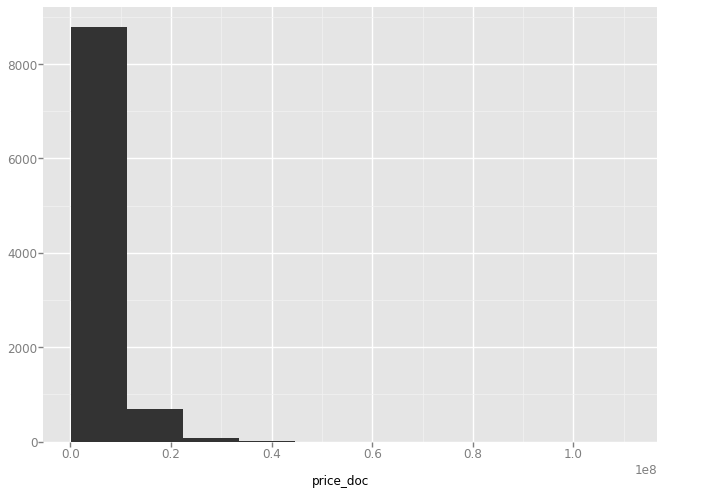

<ggplot: (8791936170167)>


In [44]:
gg = ggplot(nan_ls,aes(x='price_doc'))+geom_histogram()
print(gg)

**xgboost can handle missing values by itself. So, we do not touch it at this moment.**

In [46]:
non_nan_ls = train[train['life_sq'].notnull()]

/home/jiashen/env3/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


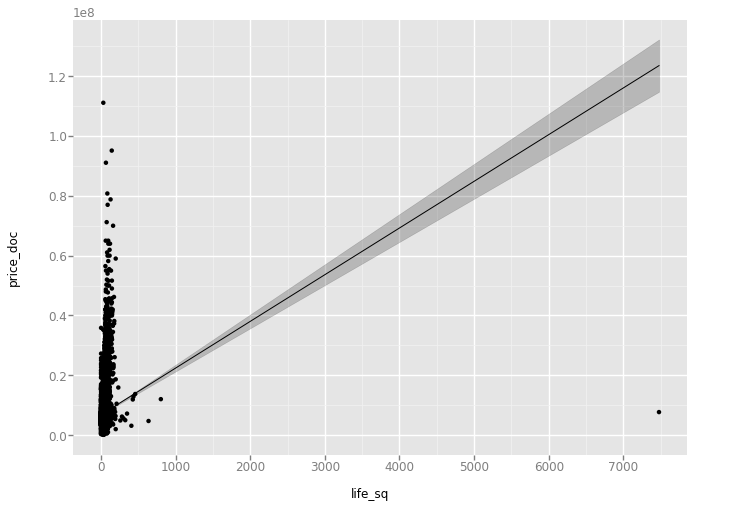

<ggplot: (-9223363244931950013)>


In [56]:
ggg = ggplot(non_nan_ls,aes(x='life_sq',y='price_doc'))+geom_point()+stat_smooth()
print(ggg)

In [51]:
max_ls = max(train['life_sq'])

In [94]:
max_ls_dt = train[train['life_sq']<max_ls]
max_ls_dt.shape

(24087, 292)

This is definitely something wrong.

In [57]:
non_nan_ls_sub = non_nan_ls[non_nan_ls['life_sq']<max_ls]

In [58]:
np.corrcoef(non_nan_ls['life_sq'],non_nan_ls['price_doc'])

array([[ 1.        ,  0.16560597],
       [ 0.16560597,  1.        ]])

In [59]:
np.corrcoef(non_nan_ls_sub['life_sq'],non_nan_ls_sub['price_doc'])

array([[ 1.        ,  0.41484486],
       [ 0.41484486,  1.        ]])

### Get rid of that super-big one!

In [70]:
non_nan_ls_sub = non_nan_ls_sub[non_nan_ls_sub['full_sq']>=2]

In [71]:
non_nan_ls_sub['ratio']=non_nan_ls_sub['life_sq']/non_nan_ls_sub['full_sq']

/home/jiashen/env3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [72]:
np.corrcoef(non_nan_ls_sub['ratio'],non_nan_ls_sub['price_doc'])

array([[ 1.        ,  0.00687214],
       [ 0.00687214,  1.        ]])

**This is not a good feature**

Build-Year

In [145]:
buYear = train[train['build_year'].notnull()]
buYear = buYear[buYear['build_year']<3000]

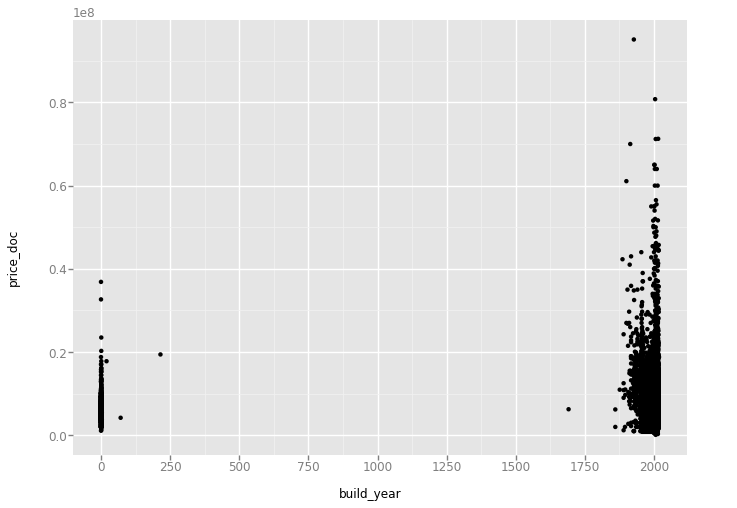

<ggplot: (-9223363244931949999)>


In [146]:
gg = ggplot(buYear,aes(x='build_year',y='price_doc'))+geom_point()
print(gg)

Test xgboost if we remove abnormal values.

In [98]:
%run Pre.py

In [99]:
%run Pre.py
#print(train.shape)
train = train[train['full_sq']<max_sq]
print(train.shape)
train = train[train['full_sq']>0]
print(train.shape)
train = train[train['life_sq']!=max_ls]
print(train.shape)

(30470, 292)
(30468, 292)
(30467, 292)


In [101]:
train['tmp']=range(0,len(train))
vv = train.query('full_sq<life_sq')
train = train[~train['tmp'].isin(list(vv['tmp']))]

In [103]:
del train['tmp']

In [104]:
del train['timestamp']
label = train['price_doc']
del train['price_doc']

In [105]:
tid= test['id']

In [106]:
del train['id']
del test['id']

In [108]:
del test['timestamp']

In [109]:
dtrain = xgb.DMatrix(train,label)
dtest = xgb.DMatrix(test)

In [117]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [118]:
xgb_cvalid = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print(len(xgb_cvalid))

[0]	train-rmse:8.20426e+06	test-rmse:8.20973e+06
[50]	train-rmse:2.33985e+06	test-rmse:2.87096e+06
[100]	train-rmse:1.99578e+06	test-rmse:2.71123e+06
[150]	train-rmse:1.8698e+06	test-rmse:2.68074e+06
[200]	train-rmse:1.77772e+06	test-rmse:2.66719e+06
[250]	train-rmse:1.69991e+06	test-rmse:2.66278e+06
[300]	train-rmse:1.63251e+06	test-rmse:2.66043e+06
[350]	train-rmse:1.56819e+06	test-rmse:2.65976e+06
361


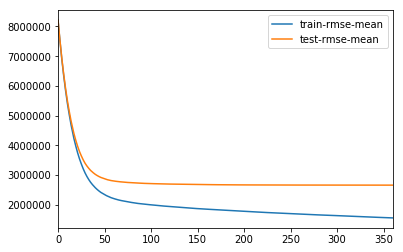

In [119]:
plt.show()

In [120]:
model = xgb.train(xgb_params,dtrain,num_boost_round=len(xgb_cvalid))

In [121]:
get_feature_importance(model)

,Feature,Score
240,full_sq,1756
45,life_sq,902
152,floor,720
58,build_year,545
2,max_floor,527
108,kitch_sq,281
73,num_room,248
47,kindergarten_km,207
227,state,195
151,metro_min_avto,162


In [122]:
prediction = model.predict(dtest)
submission = pd.DataFrame({'id':tid,'price_doc':prediction})
submission.to_csv('Submission_sqoutliersout2.csv',index=False)

**Try Train with year,month and day features**

In [123]:
%run Pre.py
#print(train.shape)
train = train[train['full_sq']<max_sq]
print(train.shape)
train = train[train['full_sq']>0]
print(train.shape)
train = train[train['life_sq']!=max_ls]
print(train.shape)

(30470, 292)
(30468, 292)
(30467, 292)


In [124]:
train['year']=train['timestamp'].apply(lambda x:int(x.split('-')[0]))
train['month']=train['timestamp'].apply(lambda x:int(x.split('-')[1]))
train['day']=train['timestamp'].apply(lambda x:int(x.split('-')[2]))

In [126]:
test['year']=test['timestamp'].apply(lambda x:int(x.split('-')[0]))
test['month']=test['timestamp'].apply(lambda x:int(x.split('-')[1]))
test['day']=test['timestamp'].apply(lambda x:int(x.split('-')[2]))

In [127]:
train['tmp']=range(0,len(train))
vv = train.query('full_sq<life_sq')
train = train[~train['tmp'].isin(list(vv['tmp']))]

In [128]:
del train['tmp']
del train['timestamp']
del test['timestamp']
del test['id']
del train['id']

In [129]:
label = train['price_doc']
del train['price_doc']
dtrain=xgb.DMatrix(train,label)
dtest=xgb.DMatrix(test)

In [130]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [131]:
xgb_cvalid = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
xgb_cvalid[['train-rmse-mean', 'test-rmse-mean']].plot()
print(len(xgb_cvalid))

[0]	train-rmse:8.20776e+06	test-rmse:8.21085e+06
[50]	train-rmse:2.51083e+06	test-rmse:2.89506e+06
[100]	train-rmse:2.17753e+06	test-rmse:2.71551e+06
[150]	train-rmse:2.05411e+06	test-rmse:2.67419e+06
[200]	train-rmse:1.96772e+06	test-rmse:2.65373e+06
[250]	train-rmse:1.8949e+06	test-rmse:2.63870e+06
[300]	train-rmse:1.83568e+06	test-rmse:2.63097e+06
[350]	train-rmse:1.7737e+06	test-rmse:2.62492e+06
[400]	train-rmse:1.72259e+06	test-rmse:2.6224e+06
410


In [132]:
model = xgb.train(xgb_params,dtrain,num_boost_round=len(xgb_cvalid))
get_feature_importance(model)

,Feature,Score
239,full_sq,1206
172,life_sq,608
146,floor,340
59,build_year,284
3,max_floor,249
106,kitch_sq,161
73,num_room,154
151,year,145
91,state,136
52,day,130


In [133]:
prediction = model.predict(dtest)
submission = pd.DataFrame({'id':tid,'price_doc':prediction})
submission.to_csv('Submission_sqoutlierplusymd.csv',index=False)

**In train: check build year**

In [134]:
len(train[train['build_year'].isnull()])

13590

In [139]:
train['buil']

True